# Multiscale Retinex
## Multi-scale Retinex with Chromacity Preservation (MSRCP) and Multi-Scale Retinex with Color Restoration (MSRCR)
source: https://www.ipol.im/pub/art/2014/107/?utm_source=doi

In [ ]:
# clones repo
!git clone https://github.com/muggledy/retinex.git

Cloning into 'retinex'...
remote: Enumerating objects: 1330, done.
remote: Counting objects: 100% (1330/1330), done.
remote: Compressing objects: 100% (1317/1317), done.
remote: Total 1330 (delta 11), reused 1326 (delta 10), pack-reused 0
Receiving objects: 100% (1330/1330), 29.79 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
from retinex.code.plot import contrast_plot,demo_viper_with_retinex
from retinex.code.plot import contrast_plot,demo_viper_with_retinex
from retinex.code.retinex import retinex_FM,retinex_SSR,retinex_MSR,retinex_MSRCR,retinex_gimp,retinex_MSRCP,retinex_AMSR
from retinex.code.tools import cv2_heq
import os.path
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
imgs = sorted(glob.glob("/content/drive/MyDrive/BolsaInvestigacao/dataset_recifes/test/*"))

In [ ]:
import os
if not os.path.isdir("/content/output_MSRCR/"):
  os.makedirs("/content/output_MSRCR/")

if not os.path.isdir("/content/output_MSRCP/"):
  os.makedirs("/content/output_MSRCP/")

for img in imgs:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))

  img_MSRCR = retinex_MSRCR(im)
 # img_MSRCR = cv2.cvtColor(img_MSRCR, cv2.COLOR_RGB2BGR)
  cv2.imwrite("/content/output_MSRCR/"+"out_"+ os.path.basename(img), img_MSRCR)

  img_MSRCP = retinex_MSRCP(im)
  # img_MSRCP = cv2.cvtColor(img_MSRCP, cv2.COLOR_RGB2BGR)
  cv2.imwrite("/content/output_MSRCP/"+"out_"+ os.path.basename(img), img_MSRCP)

@measure_time: retinex_MSRCR took 0.6838538646697998 seconds
@measure_time: retinex_MSRCP took 0.2526259422302246 seconds
@measure_time: retinex_MSRCR took 0.6961848735809326 seconds
@measure_time: retinex_MSRCP took 0.2550361156463623 seconds
@measure_time: retinex_MSRCR took 0.7198042869567871 seconds
@measure_time: retinex_MSRCP took 0.25085997581481934 seconds
@measure_time: retinex_MSRCR took 0.6848065853118896 seconds
@measure_time: retinex_MSRCP took 0.25032711029052734 seconds
@measure_time: retinex_MSRCR took 0.6966204643249512 seconds
@measure_time: retinex_MSRCP took 0.24386239051818848 seconds
@measure_time: retinex_MSRCR took 0.728034496307373 seconds
@measure_time: retinex_MSRCP took 0.3312556743621826 seconds
@measure_time: retinex_MSRCR took 0.8442270755767822 seconds
@measure_time: retinex_MSRCP took 0.33322978019714355 seconds
@measure_time: retinex_MSRCR took 0.8401491641998291 seconds
@measure_time: retinex_MSRCP took 0.24241065979003906 seconds
@measure_time: retin

## Results Visualization

In [ ]:
imgs_out_MSRCP = sorted(glob.glob("/content/output_MSRCP/*"))
imgs_out_MSRCR = sorted(glob.glob("/content/output_MSRCR/*"))

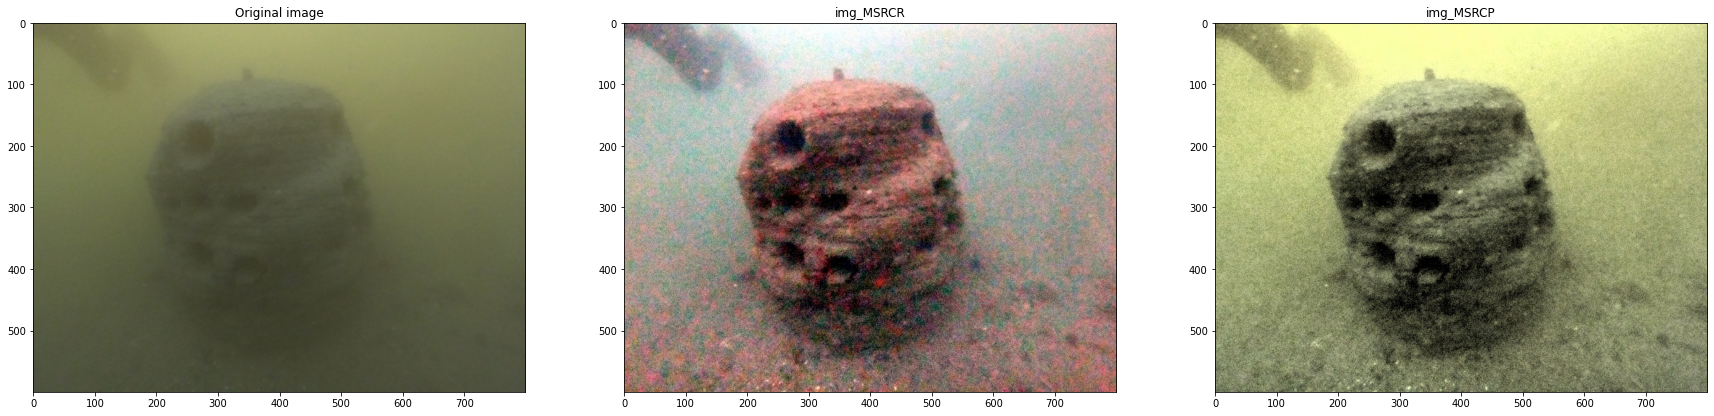

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(30, 30))

img = cv2.imread(imgs[1])
img = cv2.resize(img, (800, 600))
ax[0].imshow(img)
ax[0].set_title("Original image")


img_out_MSRCR = cv2.imread(imgs_out_MSRCR[1])
img_out_MSRCR = cv2.cvtColor(img_out_MSRCR, cv2.COLOR_RGB2BGR)
ax[1].imshow(img_out_MSRCR)
ax[1].set_title("img_MSRCR")

img_out_MSRCP = cv2.imread(imgs_out_MSRCP[1])
img_out_MSRCP = cv2.cvtColor(img_out_MSRCP, cv2.COLOR_RGB2BGR)
ax[2].imshow(img_out_MSRCP)
ax[2].set_title("img_MSRCP")

plt.show()

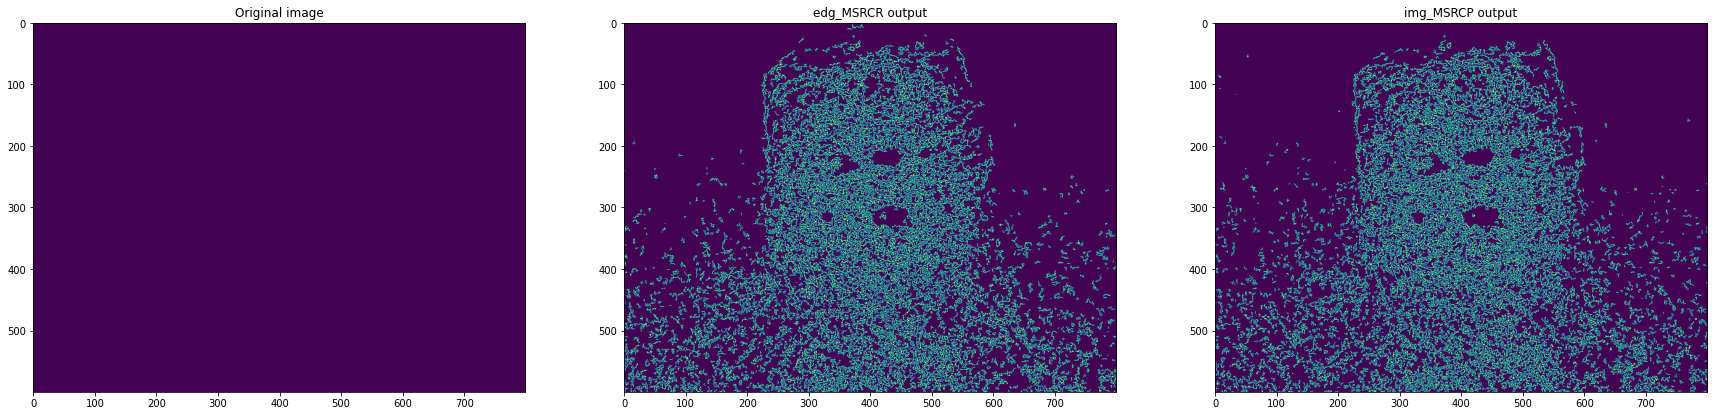

In [ ]:
edg_MSRCR = cv2.Canny(img_out_MSRCR,100,200)
edg_MSRCP = cv2.Canny(img_out_MSRCP,100,200)
img = cv2.resize(img, (800, 600))
edg_in = cv2.Canny(img,100,200)

fig, ax = plt.subplots(ncols=3, figsize=(30, 30))
ax[0].imshow(edg_in)
ax[0].set_title("Original image")

ax[1].imshow(edg_MSRCR)
ax[1].set_title("edg_MSRCR output")

ax[2].imshow(edg_MSRCP)
ax[2].set_title("img_MSRCP output")

plt.show()

## Evalution Metrics Functions

In [ ]:
# source: https://github.com/Riccellisp/ProjetoPecem/blob/ba8c5e7b991e93044e3c86c42e48d3df4c9595fb/metrics.py

from skimage.metrics import structural_similarity as ssim
from skimage import color,filters
import numpy as np
import math
import sys

def plipsum(i,j,gamma=1026):
    return i + j - i * j / gamma

def plipsub(i,j,k=1026):
    return k * (i - j) / (k - j)

def plipmult(c,j,gamma=1026):
    return gamma - gamma * (1 - j / gamma)**c

def logamee(ch,blocksize=8):

    num_x = math.ceil(ch.shape[0] / blocksize)
    num_y = math.ceil(ch.shape[1] / blocksize)

    s = 0
    w = 1. / (num_x * num_y)
    for i in range(num_x):

        xlb = i * blocksize
        if i < num_x - 1:
            xrb = (i+1) * blocksize
        else:
            xrb = ch.shape[0]

        for j in range(num_y):

            ylb = j * blocksize
            if j < num_y - 1:
                yrb = (j+1) * blocksize
            else:
                yrb = ch.shape[1]

            block = ch[xlb:xrb,ylb:yrb]
            blockmin = float(np.min(block))
            blockmax = float(np.max(block))

            top = plipsub(blockmax,blockmin)
            bottom = plipsum(blockmax,blockmin)

            # if bottom == 0, result == 0
            m = bottom and top / bottom or 0
            if m ==0.:
                s+=0
            else:
                s += (m) * np.log(m)

    return plipmult(w,s)

def eme(img,rowSample,columnSample):

	grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	rowSize, columnSize = grayImg.shape
	nRows = int(rowSize/rowSample)
	nColumns = int(columnSize/columnSample)
	incompleteRow = math.ceil(rowSize/rowSample) - nRows
	incompleteColumn = math.ceil(columnSize/columnSample) - nColumns

	somatory = 0
	nBlocks = nRows*nColumns
	for i in range(0,nRows):
		for j in range(0,nColumns):
			imax=grayImg[i*rowSample:(i+1)*rowSample,j*columnSample:(j+1)*rowSample].max()
			imin=grayImg[i*rowSample:(i+1)*rowSample,j*columnSample:(j+1)*rowSample].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)

	if incompleteColumn==1:
		for i in range(0,nRows):
			imax=grayImg[i*rowSample:(i+1)*rowSample,nColumns*columnSample:columnSize].max()
			imin=grayImg[i*rowSample:(i+1)*rowSample,nColumns*columnSample:columnSize].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)
			nBlocks = nBlocks + 1
	if incompleteRow==1:
		for j in range(0,nColumns):
			imax=grayImg[grayImg[nRows*rowSample:rowSize,j*columnSample:(j+1)*columnSample]].max()
			imin=grayImg[grayImg[nRows*rowSample:rowSize,j*columnSample:(j+1)*columnSample]].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)
			nBlocks = nBlocks + 1
	if incompleteRow==1 and incompleteColumn==1:
		imax=grayImg[nRows*rowSample:rowSize,nColumns*columnSample:columnSize].max()
		imin=grayImg[nRows*rowSample:rowSize,nColumns*columnSample:columnSize].max()
		if imin==0:
			imin=1
		if imax==0:
			imax=1
		somatory = somatory + 20*math.log(imax/imin)
		nBlocks = nBlocks + 1
	return somatory/nBlocks

def UCIQE(a,c1=0.4680,c2 = 0.2745,c3 = 0.2576):
    """
    Underwater colour image quality evaluation metric (UCIQE) é uma métrica baseada na combinação
    linear de croma (pureza), saturação e contraste principalmente de imagens subaquáticas, mas também
    baseadaem trabalhos atuais de avaliação de imagens coloridas atmosféricas.
    REF: M. Yang and A. Sowmya, "An Underwater Color Image Quality Evaluation Metric," in IEEE Transactions on Image Processing,
    vol. 24, no. 12, pp. 6062-6071, Dec. 2015, doi: 10.1109/TIP.2015.2491020.
    :param a: imagem de entrada
    :c1,c2,c3: coeficentes ponderados
    :return c1 * sc + c2 * conl + c3 * us
    """
    rgb = a
    lab = color.rgb2lab(a)
    l = lab[:,:,0]

    #1st term
    chroma = (lab[:,:,1]**2 + lab[:,:,2]**2)**0.5
    uc = np.mean(chroma)
    sc = (np.mean((chroma - uc)**2))**0.5

    #2nd term
    top = int(np.round(0.01*l.shape[0]*l.shape[1]))
    sl = np.sort(l,axis=None)
    isl = sl[::-1]
    conl = np.mean(isl[:top])-np.mean(sl[:top])

    #3rd term
    satur = []
    chroma1 = chroma.flatten()
    l1 = l.flatten()
    for i in range(len(l1)):
      if chroma1[i] == 0: satur.append(0)
      elif l1[i] == 0: satur.append(0)
      else: satur.append(chroma1[i] / l1[i])

    us = np.mean(satur)

    return  c1 * sc + c2 * conl + c3 * us

def UIQM(a,p1=0.0282,p2=0.2953,p3=3.5753):
    """
    REF: K. Panetta, C. Gao and S. Agaian, Human-Visual-System-Inspired Underwater Image Quality Measures,
    in IEEE Journal of Oceanic Engineering, vol. 41, no. 3, pp. 541-551, July 2016, doi: 10.1109/JOE.2015.2469915.
    Metrica sem referencia, semelhante a UCIQE, mas mais atual. Leva em consideração a medida de colorção,
    medida de nitidez e medida de contraste.
    """
    #1st term UICM
    #TαL=⌈αLK⌉ - > o inteiro mais próximo maior ou igual a αLK
    #TαR=⌊αRK⌋ - > o inteiro mais próximo menor ou igual a αRK
    rgb=a
    gray = color.rgb2gray(a)
    rg = rgb[:,:,0] - rgb[:,:,1]
    yb = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]
    rgl = np.sort(rg,axis=None)
    ybl = np.sort(yb,axis=None)
    al1 = 0.1
    al2 = 0.1
    T1 = int(al1 * len(rgl))
    T2 = int(al2 * len(rgl))
    rgl_tr = rgl[T1:-T2]
    ybl_tr = ybl[T1:-T2]

    urg = np.mean(rgl_tr) # μ^2_α,RG
    s2rg = np.mean((rgl_tr - urg) ** 2)  # σ2α,RG
    uyb = np.mean(ybl_tr) # μ^2_α,YB
    s2yb = np.mean((ybl_tr- uyb) ** 2) # σ2α,YB

    uicm =-0.0268 * np.sqrt(urg**2 + uyb**2) + 0.1586 * np.sqrt(s2rg + s2yb)

    #2nd term UISM (k1k2=8x8)   # medida de nitidez de imagem
    """Para medir a nitidez nas bordas, o detector de bordas Sobel é aplicado primeiro em cada componente de cor RGB
      O mapa de arestas resultante é então multiplicado pela imagem original para obter o mapa de arestas em tons de cinza."""
    # Rsobel = rgb[:,:,0] * filters.sobel(rgb[:,:,0])
    # Gsobel = rgb[:,:,1] * filters.sobel(rgb[:,:,1])
    # Bsobel = rgb[:,:,2] * filters.sobel(rgb[:,:,2])

    # Rsobel=np.round(Rsobel).astype(np.uint8)  # Arredonda a matriz para numeros inteiros
    # Gsobel=np.round(Gsobel).astype(np.uint8)
    # Bsobel=np.round(Bsobel).astype(np.uint8)

    Reme = eme(a,8,8)
    Geme = eme(a,8,8)
    Beme = eme(a,8,8)
    uism = 0.299 * Reme + 0.587 * Geme + 0.114 * Beme

    #3rd term UIConM
    uiconm = logamee(gray)
    uiqm = p1 * uicm + p2 * uism + p3 * uiconm

    return uiqm

def CCF(imageRGB):
	"""REF:
	@article{WANG2018904,
	title = {An imaging-inspired no-reference underwater color image quality assessment metric},
	journal = {Computers & Electrical Engineering},
	volume = {70},
	pages = {904-913},
	year = {2018},
	issn = {0045-7906},
	doi = {https://doi.org/10.1016/j.compeleceng.2017.12.006},
	url = {https://www.sciencedirect.com/science/article/pii/S0045790617324953},
	author = {Yan Wang and Na Li and Zongying Li and Zhaorui Gu and Haiyong Zheng and Bing Zheng and Mengnan Sun},
	keywords = {No-reference image quality assessment, Underwater imaging, Underwater image, Underwater color image quality},
	abstract = {Underwater color image quality assessment (IQA) plays an important role in analysis and applications of underwater imaging as well as image processing algorithms. This paper presents a new metric inspired by the imaging analysis on underwater absorption and scattering characteristics, dubbed the CCF. This metric is feature-weighted with a combination of colorfulness index, contrast index and fog density index, which can quantify the color loss caused by absorption, the blurring caused by forward scattering and the foggy caused by backward scattering, respectively. Then multiple linear regression is used to calculate three weighted coefficients. A new underwater image database is built to illustrate the performance of the proposed metric. Experimental results show a strong correlation between the proposed metric and mean opinion score (MOS). The proposed CCF metric outperforms many of the leading atmospheric IQA metrics, and it can effectively assess the performance of underwater image enhancement and image restoration methods.}
	}

	Métrica sem referência. Essa métrica é ponderada por recursos com uma combinação de índice de colorido,
	índice de contraste e índice de densidade de neblina, que pode quantificar a perda de cor
	causada pela absorção, o desfoque causado pela dispersão para frente e o nevoeiro causado
	pela dispersão para trás, respectivamente.
	"""
  # Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0], out=np.zeros_like(rgb[:,:,0])-np.mean(rgb[:,:,0]), where=(rgb[:,:,0])-np.mean(rgb[:,:,0]!=0))
	# Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1], out=np.zeros_like(rgb[:,:,1])-np.mean(rgb[:,:,1]), where=(rgb[:,:,1])-np.mean(rgb[:,:,1]!=0))
	# Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2], out=np.zeros_like(rgb[:,:,2])-np.mean(rgb[:,:,2]), where=(rgb[:,:,2])-np.mean(rgb[:,:,2]!=0))
	rgb=imageRGB
	gray = color.rgb2gray(imageRGB)
	# Passo 1
	Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0])
	Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1])
	Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2])

	# Passo 2
	a = rgb[:,:,0] - rgb[:,:,1]
	b = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]

	var_a  = np.var(a)
	var_b  = np.var(b)
	mean_a = np.mean(a)
	mean_b = np.mean(b)

	ccf=(math.sqrt(var_a+var_b)+0.3*math.sqrt(var_a+var_b)) /85.59


	return ccf

In [ ]:
UIQM_list, UCIQE_list, CCF_list  = list(), list(), list()
UIQM_MSRCR_list, UCIQE_MSRCR_list, CCF_MSRCR_list  = list(), list(), list()
UIQM_MSRCP_list, UCIQE_MSRCP_list, CCF_MSRCP_list  = list(), list(), list()
for img in imgs:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_list.append(UIQM(im))
  UCIQE_list.append(UCIQE(im))
  CCF_list.append(CCF(im))

for img in imgs_out_MSRCR:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_MSRCR_list.append(UIQM(im))
  UCIQE_MSRCR_list.append(UCIQE(im))
  CCF_MSRCR_list.append(CCF(im))

for img in imgs_out_MSRCP:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_MSRCP_list.append(UIQM(im))
  UCIQE_MSRCP_list.append(UCIQE(im))
  CCF_MSRCP_list.append(CCF(im))

<ipython-input-50-d251416d0a88>:230: RuntimeWarning: divide by zero encountered in log
  Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2])
<ipython-input-50-d251416d0a88>:228: RuntimeWarning: divide by zero encountered in log
  Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0])
<ipython-input-50-d251416d0a88>:229: RuntimeWarning: divide by zero encountered in log
  Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1])


In [ ]:
np.mean(UIQM_list), np.std(UIQM_list)

(0.7511057229103216, 0.6609179233059735)

In [ ]:
np.mean(UCIQE_list), np.std(UCIQE_list)

(18.056804946491035, 3.3883908529062317)

In [ ]:
np.mean(CCF_list), np.std(CCF_list)

(1.1041827219337752, 0.5398153030639654)

In [ ]:
np.mean(UIQM_MSRCR_list), np.std(UIQM_MSRCR_list)

(6.203010815710411, 1.2189792254860243)

In [ ]:
np.mean(UCIQE_MSRCR_list), np.std(UCIQE_MSRCR_list)

(30.14037502550153, 0.5019307295969561)

In [ ]:
np.mean(CCF_MSRCR_list), np.std(CCF_MSRCR_list)

(1.8132841622219518, 0.10448227196887819)

In [ ]:
np.mean(UIQM_MSRCP_list), np.std(UIQM_MSRCP_list)

(6.56234373210505, 1.3639147513256866)

In [ ]:
np.mean(UCIQE_MSRCP_list), np.std(UCIQE_MSRCP_list)

(29.300144317342316, 0.3766124617950255)

In [ ]:
np.mean(CCF_MSRCP_list), np.std(CCF_MSRCP_list)

(1.1781316729042286, 0.1661122789113665)

In [ ]:
!zip -r /content/output_MSRCP.zip /content/output_MSRCP
!zip -r /content/output_MSRCR.zip /content/output_MSRCR

updating: content/output_MSRCP/ (stored 0%)
updating: content/output_MSRCP/out_G0042011.JPG (deflated 0%)
updating: content/output_MSRCP/out_G0042007.JPG (deflated 0%)
updating: content/output_MSRCP/out_G1966145.JPG (deflated 0%)
updating: content/output_MSRCP/out_G0062064.JPG (deflated 0%)
updating: content/output_MSRCP/out_G0041984.JPG (deflated 0%)
updating: content/output_MSRCP/out_G1565745.JPG (deflated 0%)
updating: content/output_MSRCP/out_G0042036.JPG (deflated 0%)
updating: content/output_MSRCP/out_G1906085.JPG (deflated 0%)
updating: content/output_MSRCP/out_G4480034.JPG (deflated 0%)
updating: content/output_MSRCP/out_G0112235.JPG (deflated 0%)
updating: content/output_MSRCP/out_G1535711.JPG (deflated 0%)
updating: content/output_MSRCP/out_G4460010.JPG (deflated 0%)
updating: content/output_MSRCP/out_G3879429.JPG (deflated 0%)
updating: content/output_MSRCP/out_G1525696.JPG (deflated 0%)
updating: content/output_MSRCP/out_G0102190.JPG (deflated 0%)
updating: content/output_M